In [1]:
import urllib.parse
import requests
import pandas as pd
from datetime import datetime
import numpy as np
import re
import matplotlib.pyplot as plt

# Load the Scrapped CSV

In [2]:
df = pd.read_csv('dataset/pantarlih.csv')
df = df.drop(columns='Unnamed: 0')
df

,url,title,content,source,date
0,https://sulteng.antaranews.com/berita/259755/k...,KPU Palu mulai bentuk 1.174 petugas pemutakhir...,"""Penyusunan data pemilih merupakan salah satu ...","ANTARA News Palu, Sulawesi Tengah",5 jam lalu
1,https://www.detik.com/jateng/berita/d-6537691/...,"Serba-serbi Pantarlih Pemilu 2024: Gaji, Syara...",Pantarlih bertugas melakukan pendaftaran dan p...,Detikcom,3 jam lalu
2,https://www.merdeka.com/trending/gaji-pantarli...,"Gaji Pantarlih Pemilu 2024, Pahami Kewajiban B...",Membantu dan melakukan koordinasi PPS (Panitia...,Merdeka,1 hari lalu
3,https://www.bawaslu.go.id/id/berita/bawaslu-su...,Bawaslu Susun Pembaharuan Alat Kerja Pengawasa...,Misalnya soal juknis (petunjuk teknis) pemutah...,Bawaslu RI,1 minggu lalu
4,https://kupastuntas.co/2023/01/27/potensi-kera...,"Potensi Kerawanan Pembentukan Pantarlih, Ini K...",... potensi kerawanan dalam tahapan pembentuka...,Kupas Tuntas,10 jam lalu
...,...,...,...,...,...
9995,https://www.bawaslu.go.id/id/berita/independen...,Independensi Hakim Peradilan dan Keadilan Pemi...,"Saat ini, Pemilu 2024 di tahapan Pencalonan Pe...",Bawaslu RI,"Oct 11, 2022"
9996,https://www.bawaslu.go.id/id/berita/audiensi-d...,"Audiensi dengan CNE Timor Leste, Bagja Paparka...","Jakarta, Badan Pengawas Pemilihan Umum - Bawas...",Bawaslu RI,"Sep 29, 2022"
9997,https://www.kba.one/news/kaum-milenial-harapka...,Kaum Milenial Harapkan “Wajah Baru” Muncul pad...,Pada Pemilihan Umum (Pemilu) serentak yang dil...,KBA.ONE,"Oct 25, 2022"
9998,https://www.bawaslu.go.id/id/berita/di-sulteng...,"Di Sulteng, Puadi Yakinkan Bawaslu Terus Lakuk...","Palu, Badan Pengawas Pemilihan Umum - Koordina...",Bawaslu,"Jul 14, 2022"


In [3]:
df['date'].unique()

array(['5 jam lalu', '3 jam lalu', '1 hari lalu', '1 minggu lalu',
       '10 jam lalu', '11 jam lalu', '22 jam lalu', '4 hari lalu',
       '5 hari lalu', '3 hari lalu', '1 jam lalu', '2 hari lalu',
       '6 hari lalu', '2 minggu lalu', '1 bulan lalu', '3 minggu lalu',
       '19 Agu 2022', '1 Jul 2022', '8 Nov 2022', '12 Jul 2022',
       '15 Okt 2022', '4 Agu 2022', '10 Jun 2022', '17 Okt 2022',
       '8 Jun 2022', '14 Jun 2022', '14 Okt 2022', '13 Jul 2022',
       '6 Sep 2022', '2 Sep 2022', '25 Nov 2022', '24 Jun 2022',
       '23 Jun 2022', '7 Apr 2022', '26 Nov 2022', '27 Nov 2022',
       '1 Des 2022', '20 Jul 2022', '18 Nov 2022', '12 Agu 2022',
       '3 Okt 2022', '17 Apr 2022', '21 Jun 2022', '9 Nov 2022',
       '18 Jul 2022', '23 Sep 2022', '10 hours ago', '22 hours ago',
       '1 day ago', '11 hours ago', '4 days ago', '1 week ago',
       '5 days ago', '3 days ago', '1 hour ago', '2 days ago',
       '6 days ago', '1 month ago', '2 weeks ago', '3 weeks ago',
       

In [4]:
def str_timedelta_to_datetime(string):
    str_lower = string.lower();
    split = np.array(str_lower.split())
    result = None
    
    if (split[-1] == 'lalu'):
        for cat in ['detik', 'dtk', 'menit', 'mnt', 'jam', 'hari', 'minggu', 'bulan']:
            x = split[np.where(split == cat)[0] - 1]
            if(len(x) < 1):
                continue
            else:
                amount = int(x[0])
                if(cat == 'detik' or cat == 'dtk'):
                    deltaSubstract = relativedelta(seconds=amount)
                elif(cat == 'menit' or cat == 'mnt'):
                    deltaSubstract = relativedelta(minutes=amount)
                elif(cat == 'jam'):
                    deltaSubstract = relativedelta(hours=amount)
                elif(cat == 'hari'):
                    deltaSubstract = relativedelta(days=amount)
                elif(cat == 'minggu'):
                    deltaSubstract = relativedelta(weeks=amount)
                elif(cat == 'bulan'):
                    deltaSubstract = relativedelta(months=amount)


                TimeResult = datetime.now() - deltaSubstract
                result = TimeResult.date()
                
    elif (split[-1] == 'ago'):
        for cat in ['seconds', 'minutes', 'hours', 'days', 'weeks', 'months']:
            x = split[np.where(split == cat)[0] - 1]
            if(len(x) < 1):
                continue
            else:
                amount = int(x[0])
                if(cat == 'seconds'):
                    deltaSubstract = relativedelta(seconds=amount)
                elif(cat == 'minutes'):
                    deltaSubstract = relativedelta(minutes=amount)
                elif(cat == 'hours'):
                    deltaSubstract = relativedelta(hours=amount)
                elif(cat == 'days'):
                    deltaSubstract = relativedelta(days=amount)
                elif(cat == 'weeks'):
                    deltaSubstract = relativedelta(weeks=amount)
                elif(cat == 'months'):
                    deltaSubstract = relativedelta(months=amount)
                    
                

                TimeResult = datetime.now() - deltaSubstract
                result = TimeResult.date()
                
    return result

In [5]:
def translate_date(string):
    string = string.lower()
    month_list = np.array([
        'jan',
        'feb',
        'mar',
        'apr',
        'mei', 'may',
        'jun', 'june', 'iun',
        'jul', 'july', 'iul',
        'agu', 'aug',
        'sep', 'sept',
        'okt', 'oct',
        'nov',
        'des', 'dec',
        ])
    
    month_dict = {
        'jan' : ['jan'],
        'feb' : ['feb'],
        'mar' : ['mar'],
        'apr' : ['apr'],
        'may' : ['mei'],
        'jun' : ['jun', 'june', 'iun'],
        'jul' : ['jul', 'july', 'iul'],
        'aug' : ['agu'],
        'sep' : ['sep', 'sept'],
        'oct' : ['okt'],
        'nov' : ['nov'],
        'dec' : ['des'],
    }
    
    month = "".join(re.split("[^a-zA-Z]*", string))
        
    if (len(np.where(month_list == month)[0]) > 0):
        
        str_res = string
        for index, keys in month_dict.items():
            for key in keys:
                if (month == key):
                    str_res = string.replace(key, index)
        return pd.to_datetime(str_res).date()
    else:
        return str_timedelta_to_datetime(string)

In [6]:
for index, row in df.iterrows():
    val = df.loc[index, 'date']
    df.loc[index, 'date'] = translate_date(val)
df

,url,title,content,source,date
0,https://sulteng.antaranews.com/berita/259755/k...,KPU Palu mulai bentuk 1.174 petugas pemutakhir...,"""Penyusunan data pemilih merupakan salah satu ...","ANTARA News Palu, Sulawesi Tengah",2023-01-28
1,https://www.detik.com/jateng/berita/d-6537691/...,"Serba-serbi Pantarlih Pemilu 2024: Gaji, Syara...",Pantarlih bertugas melakukan pendaftaran dan p...,Detikcom,2023-01-28
2,https://www.merdeka.com/trending/gaji-pantarli...,"Gaji Pantarlih Pemilu 2024, Pahami Kewajiban B...",Membantu dan melakukan koordinasi PPS (Panitia...,Merdeka,2023-01-27
3,https://www.bawaslu.go.id/id/berita/bawaslu-su...,Bawaslu Susun Pembaharuan Alat Kerja Pengawasa...,Misalnya soal juknis (petunjuk teknis) pemutah...,Bawaslu RI,2023-01-21
4,https://kupastuntas.co/2023/01/27/potensi-kera...,"Potensi Kerawanan Pembentukan Pantarlih, Ini K...",... potensi kerawanan dalam tahapan pembentuka...,Kupas Tuntas,2023-01-28
...,...,...,...,...,...
9995,https://www.bawaslu.go.id/id/berita/independen...,Independensi Hakim Peradilan dan Keadilan Pemi...,"Saat ini, Pemilu 2024 di tahapan Pencalonan Pe...",Bawaslu RI,2022-10-11
9996,https://www.bawaslu.go.id/id/berita/audiensi-d...,"Audiensi dengan CNE Timor Leste, Bagja Paparka...","Jakarta, Badan Pengawas Pemilihan Umum - Bawas...",Bawaslu RI,2022-09-29
9997,https://www.kba.one/news/kaum-milenial-harapka...,Kaum Milenial Harapkan “Wajah Baru” Muncul pad...,Pada Pemilihan Umum (Pemilu) serentak yang dil...,KBA.ONE,2022-10-25
9998,https://www.bawaslu.go.id/id/berita/di-sulteng...,"Di Sulteng, Puadi Yakinkan Bawaslu Terus Lakuk...","Palu, Badan Pengawas Pemilihan Umum - Koordina...",Bawaslu,2022-07-14


In [7]:
df.isna().sum()

url           0
title         0
content       0
source        0
date       2155
dtype: int64

In [8]:
df = df.dropna()
df.describe()

,url,title,content,source,date
count,7845,7845,7845,7845,7845
unique,212,212,204,116,112
top,https://telisik.id/news/pemutakhiran-data-pemi...,Pemutakhiran Data Pemilih untuk Pemilu Dilakuk...,"Guna memaksimalkan pengawasan daftar pemilih, ...",Bawaslu,2023-01-07
freq,98,98,347,1292,346


In [9]:
df[['title']].groupby(df['date']).count()

,title
date,
2022-02-04,1
2022-02-26,82
2022-02-27,20
2022-03-01,89
2022-03-02,23
...,...
2023-01-24,48
2023-01-25,41
2023-01-26,41


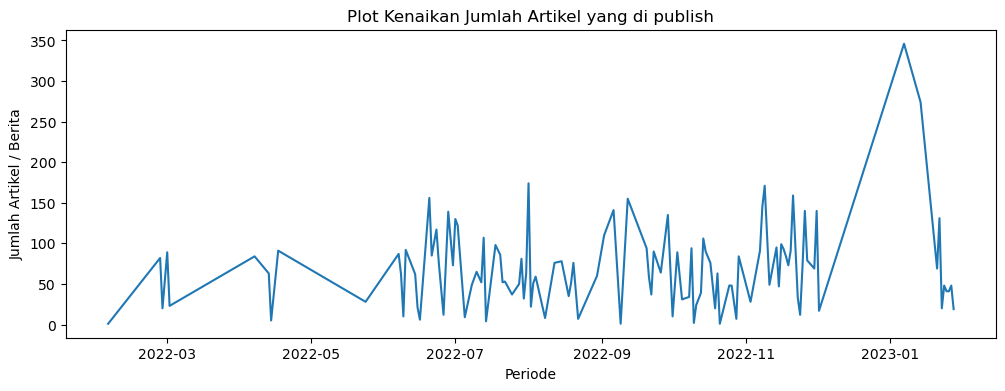

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
plt.title('Plot Kenaikan Jumlah Artikel yang di publish')
plt.xlabel('Periode')
plt.ylabel('Jumlah Artikel / Berita')
plt.plot(df[['title']].groupby(df['date']).count())